#### Задача 1
В файле graph.txt находится граф, построенный в соответствии с моделью Боллобаша-Боргса-Риордана-Чайес со следующими значениями параметров модели: $\alpha = \beta = 0.5$, $\gamma = \delta_{out} = 0$. Значение $\delta_{in}$ неизвестно.
Порядок ребер и номера вершин в файле соответствует порядку, в котором они реально появлялись.
Первое число в строчке - это начало ребра, второе - конец ребра. Начальный граф - треугольник 

[(0, 1), (1, 2), (2, 0)].

Постройте зависимость вероятности данного графа при данных значениях параметров от $\delta_{in}$ и найдите оптимальное значение, при котором появление такого графа наиболее правдоподобно.

#### Решение
Рассмотрим все новые ребра графа в порядке их появления и найдем вероятность появления каждого ребра в соответствующий момент времени. Согласно определению модели, новая вершина добавляется с вероятностью $\alpha = 0.5,$ и не добавляется (то есть ребро проводится между существующими) с вероятностью $\beta=0.5.$ Так как $\gamma = \delta_{out}=0,$ то при получении графа $G(t + 1)$
из $n_t$-вершинного графа $G(t)$ вероятность добавить новую вершину $u$ и исходящее из нее в вершину $v$ ребро есть
$$
\frac{1}{2}\cdot\frac{\mathrm{indeg}\,v + \delta_{in}}{t+\delta_{in}n_t},
$$
а вероятность провести ребро между существующими вершинами $u$ и $v$ есть

$$
\frac{1}{2}\cdot\frac{\mathrm{outdeg}u}{t}\cdot\frac{\mathrm{indeg}\,v + \delta_{ in} }{t+\delta_{in}n_t}.
$$


Вероятность конкретного графа $G(n)$ равна $\prod\limits_ip_i,$ где $p_i$ определяется по этим формулам в зависимости от того, новая ли вершина $u_i$. Имея конкретный граф, нам необходимо максимизировать эту вероятность (правдоподобие). Для того, чтобы не работать с очень маленькими числами, будем вместо задачи $\prod\limits_ip_i \to \max\limits_{\delta_{in}}$ решать эквивалентную задачу $\sum\limits_i\ln p_i \to \max\limits_{\delta_{in}}.$

Заметим, что слагаемые $\ln \frac{1}{2}$, $\ln \frac{\mathrm{outdeg}u}{t}$ не зависят от $\delta_{in},$ поэтому задача сводится к максимизации выражения 
$$
\sum\limits_i\ln\frac{\mathrm{indeg}\,v + \delta_{in}}{t+\delta_{in}n_t}=\sum\limits_i\left(\ln(\mathrm{indeg}\,v + \delta_{in}) - \ln(t+\delta_{in}n_t)\right).
$$

In [1]:
import networkx as nx
G = nx.MultiDiGraph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])

log_params = []
t = 3
for line in open("graph.txt"):
    u, v = line.strip().split('\t')
    u, v = int(u), int(v)
    # в log_params запомним indeg v, t, n_t
    log_params.append((G.in_degree(v), t, G.order()))
    t += 1
    G.add_edge(u, v)



In [2]:
from numpy import log, arange
def f(log_params, delta_in):
    res = 0
    for indeg, t, nt in log_params:
        res += log(indeg + delta_in) - log(t + delta_in * nt)
    return res

delta_in_values = []
f_values = []
for delta_in in arange(0.001, 1, 0.001):
    f_values.append(f(log_params, delta_in))
    delta_in_values.append(delta_in)

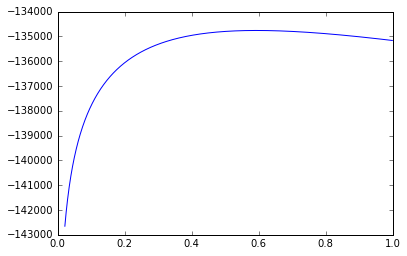

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(delta_in_values[20:],f_values[20:])
plt.show()

In [6]:
max(f_values)

-134761.03283254636

In [7]:
max(zip(delta_in_values,f_values), key=lambda x: x[1])

(0.59299999999999997, -134761.03283254636)